Question 2 - CNN Autoencoder for Image Reconstruction
Objective:
Develop and evaluate a Convolutional Neural Network (CNN) Autoencoder to reconstruct images
from a given dataset.
Instructions:
1. Dataset:
Use the Columbia University Object Image Library (COIL) dataset.
Split the dataset into training (80%) and testing (20%) sets.
2. Model Development:
Construct a CNN Autoencoder with:
Encoder: Use convolutional layers with ReLU activation to reduce the input image
to a lower-dimensional latent representation.
Decoder: Use transpose convolutional layers to reconstruct the image from the
latent space.

3. Training:
Use the Mean Squared Error (MSE) loss function.
Use Adam optimizer with a learning rate of 0.001.
Train the model for 20 epochs with a suitable batch size.
4. Evaluation:
Evaluate the model's performance using the testing set.
Visualize the reconstructed images and compare them to the original images.
Calculate and report the MSE on the test set.
5. Deliverables:
Submit the Python code with comments explaining each step.
Include the following outputs in the report:

1. Architecture of the CNN Autoencoder.
2. Loss curve during training.
3. Original vs. reconstructed images (at least 5 examples).
4. Final test MSE value.

In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input, Reshape, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow.keras.backend as K

In [2]:
# Function to load and preprocess images
def load_images(dataset_path, img_size=(128, 128)):
    images = []
    for img_file in os.listdir(dataset_path):
        img = load_img(os.path.join(dataset_path, img_file), target_size=img_size, color_mode="rgb")
        img_array = img_to_array(img) / 255.0  # Normalize to range [0, 1]
        images.append(img_array)
    return np.array(images)

# Load the dataset
dataset_path = "coil-20/coil-20-proc"
images = load_images(dataset_path)

# Split dataset into train and test sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")


Train images shape: (1152, 128, 128, 3)
Test images shape: (288, 128, 128, 3)


In [3]:
# Define the Autoencoder model
def build_autoencoder(input_shape):
    # Encoder
    input_layer = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    latent_space = Flatten()(x)
    
    # Decoder
    x = Reshape((input_shape[0] // 4, input_shape[1] // 4, 128))(latent_space)
    x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    output_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    return Model(input_layer, output_layer)

input_shape = train_images.shape[1:]
autoencoder = build_autoencoder(input_shape)
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 128, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,371 (728.01 KB)

 Trainable params: 186,371 (728.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 396ms/step - loss: 0.1246 - val_loss: 0.0104
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 455ms/step - loss: 0.0086 - val_loss: 0.0037
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 446ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 437ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 479ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 484ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 438ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 431ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 421ms/step - loss: 9.7826e-04 - val_loss: 9.2469e-04
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━

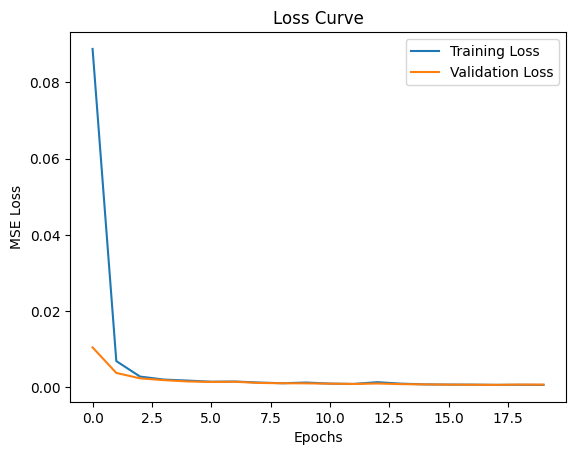

In [ ]:
# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
history = autoencoder.fit(
    train_images, train_images,
    validation_data=(test_images, test_images),
    epochs=20,
    batch_size=32,
    verbose=1
)

#loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 6.7351e-04
Final Test MSE: 0.0006780381081625819
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


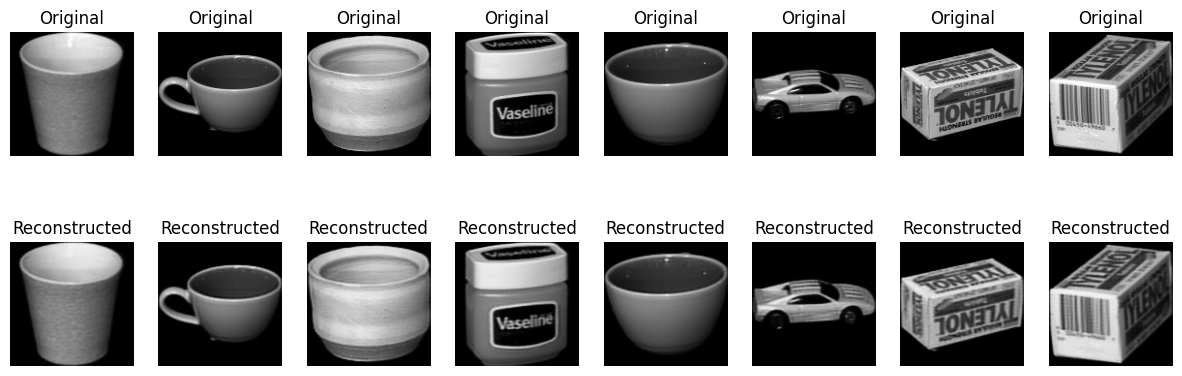

PSNR: 31.69 dB


In [10]:
# Evaluate on the test set
test_loss = autoencoder.evaluate(test_images, test_images, verbose=1)
print(f"Final Test MSE: {test_loss}")

# Visualize original and reconstructed images
def plot_reconstructed_images(original, reconstructed, num_images=8):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Original image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        # Reconstructed image
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

# Predict using the autoencoder
reconstructed_images = autoencoder.predict(test_images)

# Visualize original vs reconstructed
plot_reconstructed_images(test_images, reconstructed_images)

def calculate_psnr(original, reconstructed):
    mse = K.mean(K.square(original - reconstructed))
    psnr = 20 * K.log(1.0 / K.sqrt(mse)) / K.log(10.0)
    return psnr

psnr = calculate_psnr(test_images, reconstructed_images)
print(f"PSNR: {K.eval(psnr):.2f} dB")

